# Games_Features Analysis and Prediction

In this project, we are going to analysis on games features dataset that contain the columns below and try to use machine learning algorithm to predict the initial price of game based on the features:


1. ResponseName: name of game
2. ReleaseDate: game released date
3. Metacritic
3. RecommendationCount: number of recommendations
4. IsFree: games that are free
5. GenreIsNonGame: non game feature
6. GenreIsIndie: genre is Indie game
7. GenreIsAction: genre is action game
8. GenreIsAdventure: genre is adventure game
9. GenreIsCasual: genre is casual game	
10. GenreIsStrategy: genre is strategy game
11. GenreIsRPG: genre is rpg	
12. GenreIsSimulation: genre is simulation game
13. GenreIsEarlyAccess: genre is early access
14. GenreIsFreeToPlay: genre is free to play
15. GenreIsSports: genre is sports game	
16. GenreIsRacing: genre is racing game
17. GenreIsMassivelyMultiplayer:genre is massively multiplayer game
18. PriceInitial: price of game


### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# get data
data = pd.read_csv('games-features.csv')

In [4]:
data.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [5]:
data.shape

(12624, 19)

In [6]:
# Check missing values

data.isna().sum()

ResponseName                    0
ReleaseDate                    86
Metacritic                      0
RecommendationCount             0
IsFree                          0
GenreIsNonGame                  0
GenreIsIndie                    0
GenreIsAction                   0
GenreIsAdventure                0
GenreIsCasual                   0
GenreIsStrategy                 0
GenreIsRPG                      0
GenreIsSimulation               0
GenreIsEarlyAccess              0
GenreIsFreeToPlay               0
GenreIsSports                   0
GenreIsRacing                   0
GenreIsMassivelyMultiplayer     0
PriceInitial                    0
dtype: int64

We have 86 missing data in the release date column

In [23]:
# Drop missing date

data = data.dropna()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12538 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12538 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12538 non-null  int64  
 3   RecommendationCount          12538 non-null  int64  
 4   IsFree                       12538 non-null  bool   
 5   GenreIsNonGame               12538 non-null  bool   
 6   GenreIsIndie                 12538 non-null  bool   
 7   GenreIsAction                12538 non-null  bool   
 8   GenreIsAdventure             12538 non-null  bool   
 9   GenreIsCasual                12538 non-null  bool   
 10  GenreIsStrategy              12538 non-null  bool   
 11  GenreIsRPG                   12538 non-null  bool   
 12  GenreIsSimulation            12538 non-null  bool   
 13  GenreIsEarlyAcce

In [25]:
data.columns

Index(['ResponseName', 'ReleaseDate', 'Metacritic', 'RecommendationCount',
       'IsFree', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction',
       'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIsRPG',
       'GenreIsSimulation', 'GenreIsEarlyAccess', 'GenreIsFreeToPlay',
       'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer',
       'PriceInitial'],
      dtype='object')

In [54]:
# number of games released very year

number_games = data['ResponseName'].groupby(data['ReleaseDate']).count().sort_values(ascending=False)[:20]

In [55]:
number_games

ReleaseDate
Aug 22 2016      241
Aug 26 2016      152
Sep 9 2016        77
Sep 7 2016        68
Apr 5 2016        64
2016              59
Aug 5 2016        49
October 2016      46
2017              43
Jul 26 2016       42
Jun 24 2016       39
Jun 17 2016       39
Sep 2 2016        39
Aug 25 2016       38
Oct 14 2016       36
Jul 17 2009       36
Sep 30 2016       35
Aug 24 2016       35
November 2016     34
Oct 28 2016       34
Name: ResponseName, dtype: int64

<AxesSubplot:xlabel='ReleaseDate'>

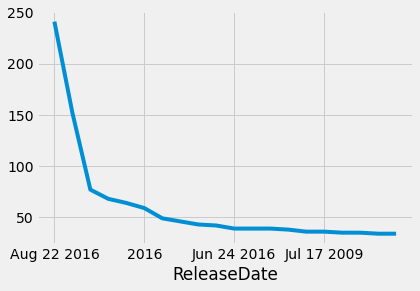

In [57]:
plt.style.use('fivethirtyeight')
number_games.plot()

In [ ]:
data['GenreAction','GenreAdventure'].value_counts().plot(kind='pie')